# SVM

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import prutils
import pandas as pd
from sklearn.model_selection import train_test_split
from numpy import genfromtxt
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA, KernelPCA, FastICA
from sklearn.model_selection import cross_val_score
from sklearn import model_selection
from skimage.feature import hog
from matplotlib.backends.backend_pdf import PdfPages

In [2]:
RAW_PIXELS_DATASET = "data/processed_nist_data.csv"
IM_FEATURES_DATASET = "data/im_features_nist_data.csv"

In [3]:
rbf_results = {}

## Extract full dataset

In [4]:
# Our dataset and targets
#my_data = genfromtxt('data/im_features_nist_data.csv', delimiter=',')
#print(my_data.shape)
#X = my_data[1:10000, 1:my_data.shape[1]]
#Y = my_data[1:10000, 0]

# Feature selection: remove features with low variance (Boolean variables --> Bernoulli variables)
#sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
#X = sel.fit_transform(X)

## Extract batch dataset

In [14]:
dataframe = pd.read_csv(IM_FEATURES_DATASET)
dataframe = dataframe.groupby("label")
my_data = dataframe.apply(lambda x: x.sample(frac=0.01)).as_matrix()

X = my_data[0:my_data.shape[0], 1:my_data.shape[1]]
Y = my_data[0:my_data.shape[0], 0]

# Feature selection: remove features with low variance (Boolean variables --> Bernoulli variables)
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
X = sel.fit_transform(X)

In [6]:
#clf = svm.SVC(kernel='rbf', gamma='auto')
##kfold = model_selection.KFold(n_splits=3)
#scores = model_selection.cross_val_score(clf, X, Y)
#print(scores)
#accuracy = np.mean(scores)
#print(accuracy*100)

## Cross validation to estimate the accuracy with the batch set 

In [7]:
#print(X.shape)
#for num_components in range(1, X.shape[1], 2):
#    
#    #if num_components > X.shape[1]:
#     #   num_components = X.shape[1]
#
#    # Feature extraction
#    
#    # PCA
#    #pca = PCA(n_components=num_components, svd_solver='auto')
#    #X_new = pca.fit_transform(X)
#    
#    # Kernel PCA
#    #kpca = KernelPCA(n_components=num_components)
#    #X_new = kpca.fit_transform(X)
#    
#    # ICA 
#    ica = FastICA(n_components=num_components, max_iter=1000)
#    X_new = ica.fit_transform(X, Y)
#    
#    print(X_new.shape)
#    
#    clf = svm.SVC(kernel='rbf', gamma='auto')
#    scores = model_selection.cross_val_score(clf, X_new, Y)
#    print(scores)
#    accuracy = np.mean(scores)*100
#    print(accuracy)
#    rbf_results[num_components] = accuracy

In [8]:
print(X.shape)
print(Y.shape)

(100, 24)
(100,)


In [9]:
# Feature extraction 

for num_components in range(1, X.shape[1], 2):
    
    if num_components > X.shape[1]:
        num_components = X.shape[1]
        
    # PCA
    #pca = PCA(n_components=num_components, svd_solver='auto')
    #X_new = pca.fit_transform(X)
    
    # Kernel PCA
    #kpca = KernelPCA(n_components=num_components)
    #X_new = kpca.fit_transform(X)
   
    # ICA 
    ica = FastICA(n_components=num_components, max_iter=1000)
    X_new = ica.fit_transform(X, Y)
   
    print(X_new.shape)
   
    X_train, X_test, y_train, y_test = train_test_split(X_new, Y, train_size=0.8, random_state=0)
    X_train = np.round(X_train, 2)
   
    clf = svm.SVC(kernel='rbf', gamma='auto')
    clf.fit(X_train, y_train)
    # Test
    y_pred = clf.predict(X_test)
    # Accuracy
    accuracy = accuracy_score(y_test, y_pred, normalize=True, sample_weight=None)*100
    print(accuracy)
    rbf_results[num_components] = accuracy
    #results.append(accuracy)

(100, 1)
0.0
(100, 3)
0.0
(100, 5)
0.0
(100, 7)
0.0
(100, 9)
0.0
(100, 11)
0.0


C:\Users\USER\Anaconda3\lib\site-packages\sklearn\decomposition\fastica_.py:116: UserWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '


(100, 13)
0.0
(100, 15)
0.0
(100, 17)
0.0
(100, 19)
20.0
(100, 21)
25.0
(100, 23)
25.0


In [10]:
## fit the model and testing with 3 different types of kernels
#for kernel in ('linear', 'poly', 'rbf'):
#    clf = svm.SVC(kernel=kernel, gamma='auto')
#    clf.fit(X_train, y_train)
#    # Test
#    y_pred = clf.predict(X_test)
#    # Accuracy
#    print(accuracy_score(y_test, y_pred, normalize=True, sample_weight=None)*100)

#X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, random_state=0)
#
#clf = svm.SVC(kernel='rbf', gamma='auto')
#clf.fit(X_train, y_train)
## Test
#y_pred = clf.predict(X_test)
## Accuracy
#accuracy = accuracy_score(y_test, y_pred, normalize=True, sample_weight=None)*100
#print(accuracy)

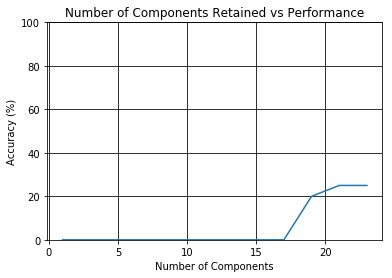

In [11]:
#save_to_file = 'FullDataset_MIR_SVM_ICA'

#print(rbf_results.keys())
#print(rbf_results.values())

pp = PdfPages("experiment-results/" + save_to_file + ".pdf")

fig = plt.figure()
plt.rc('grid', linestyle='-', color='black')
plt.title('Number of Components Retained vs Performance')
plt.xlabel('Number of Components')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 100)
plt.grid(True)
plt.plot(np.fromiter(rbf_results.keys(),dtype=float), np.fromiter(rbf_results.values(),dtype=float))
plt.show()

pp.savefig(fig)
pp.close()

In [12]:
max(rbf_results.values())

25.0

In [13]:
# Results 
# raw pixels: linear 95.4%, polynomial 79.65%, Radial Basis Function (RBF) 95.85% 
# after feature selection: linear 93.7%, polynomial 88.15%, Radial Basis Function (RBF) 96.05% 
# PCA: Radial Basis Function (RBF) 98.45% 